In [193]:
%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.learning_curve import learning_curve

from sklearn.datasets import make_classification
#from sklearn.cross_validation import train_test_split
#from sklearn import preprocessing
from sklearn import cross_validation, preprocessing
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score,roc_auc_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [244]:
df = pd.read_csv('bank-additional-full.csv')
df.head(30)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [245]:
#Output value must be numerical, so I replaced categorical 'yes'/'no' with 1/0
df.replace(['yes','no', 'unknown'],[1,0, np.nan], inplace=True)
df = df.dropna()

In [246]:
def ed_preproc(ed):
    ed_new = []
    for e in ed:
        if e == 'basic.4y' or e == 'basic.6y' or e == 'basic.9y' or e == 'illiterate' or e == 'high.school':
            e = 'some'
            ed_new.append(e)
        else:
            ed_new.append(e)
    return ed_new
df.education = ed_preproc(df.education)

In [247]:
def job_proc(job):
    job_new = []
    for j in job:
        if j == 'entrepreneur':
            j = 'self-employed'
            job_new.append(j)
        elif j == 'admin.' or j == 'services' or j == 'technician':
            j = 'professional'
            job_new.append(j)
        elif j == 'housemaid':
            j = 'unemployed'
            job_new.append(j)
        else:
            job_new.append(j)
    return job_new
df.job = job_proc(df.job)

In [248]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,unemployed,married,some,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,professional,married,some,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,professional,married,some,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,56,professional,married,some,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
6,59,professional,married,professional.course,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


In [249]:
flask_t =df.groupby('y')
flask_t.describe()

age      campaign  cons.conf.idx  cons.price.idx  \
y                                                                    
0 count  26629.000000  26629.000000   26629.000000    26629.000000   
  mean      38.838334      2.593113     -40.714638       93.552002   
  std        9.773415      2.836994       4.519967        0.564768   
  min       17.000000      1.000000     -50.800000       92.201000   
  25%       32.000000      1.000000     -42.700000       93.075000   
  50%       37.000000      2.000000     -41.800000       93.444000   
  75%       45.000000      3.000000     -36.400000       93.994000   
  max       95.000000     43.000000     -26.900000       94.767000   
1 count   3859.000000   3859.000000    3859.000000     3859.000000   
  mean      40.352682      2.026950     -39.826820       93.325331   
  std       13.510657      1.624654       6.289376        0.679298   
  min       18.000000      1.000000     -50.800000       92.201000   
  25%       30.000000      1.000000     -46.200000       92.893000   
  50%       36.000000      2.000000     -40.400000       93.075000   
  75%       48.000000      2.000000     -34.800000       93.918000   
  max       89.000000     23.000000     -26.900000       94.767000   

              default      duration  emp.var.rate     euribor3m       housing  \
y                                                                               
0 count  26629.000000  26629.000000  26629.000000  26629.000000  26629.000000   
  mean       0.000113    220.277555      0.115690      3.673637      0.539975   
  std        0.010614    209.256852      1.529655      1.689167      0.498409   
  min        0.000000      0.000000     -3.400000      0.634000      0.000000   
  25%        0.000000     95.000000     -1.800000      1.365000      0.000000   
  50%        0.000000    163.000000      1.100000      4.857000      1.000000   
  75%        0.000000    277.000000      1.400000      4.961000      1.000000   
  max        1.000000   4918.000000      1.400000      5.045000      1.000000   
1 count   3859.000000   3859.000000   3859.000000   3859.000000   3859.000000   
  mean       0.000000    530.028505     -1.363281      1.985306      0.555066   
  std        0.000000    393.966791      1.559817      1.666133      0.497023   
  min        0.000000     37.000000     -3.400000      0.634000      0.000000   
  25%        0.000000    245.000000     -2.900000      0.840000      0.000000   
  50%        0.000000    415.000000     -1.800000      1.262000      1.000000   
  75%        0.000000    706.000000     -0.100000      4.021000      1.000000   
  max        0.000000   4199.000000      1.400000      5.045000      1.000000   

                 loan   nr.employed         pdays      previous  
y                                                                
0 count  26629.000000  26629.000000  26629.000000  26629.000000  
  mean       0.157084   5171.234293    981.438282      0.148898  
  std        0.363887     67.510818    130.879129      0.433787  
  min        0.000000   4963.600000      0.000000      0.000000  
  25%        0.000000   5099.100000    999.000000      0.000000  
  50%        0.000000   5195.800000    999.000000      0.000000  
  75%        0.000000   5228.100000    999.000000      0.000000  
  max        1.000000   5228.100000    999.000000      7.000000  
1 count   3859.000000   3859.000000   3859.000000   3859.000000  
  mean       0.151594   5088.904172    783.088624      0.507385  
  std        0.358673     85.197657    409.692747      0.865283  
  min        0.000000   4963.600000      0.000000      0.000000  
  25%        0.000000   5017.500000    999.000000      0.000000  
  50%        0.000000   5076.200000    999.000000      0.000000  
  75%        0.000000   5191.000000    999.000000      1.000000  
  max        1.000000   5228.100000    999.000000      6.000000

In [255]:
print(df.loc[df['y'] == 1]).describe()

               age  default      housing         loan     duration  \
count  3859.000000     3859  3859.000000  3859.000000  3859.000000   
mean     40.352682        0     0.555066     0.151594   530.028505   
std      13.510657        0     0.497023     0.358673   393.966791   
min      18.000000        0     0.000000     0.000000    37.000000   
25%      30.000000        0     0.000000     0.000000   245.000000   
50%      36.000000        0     1.000000     0.000000   415.000000   
75%      48.000000        0     1.000000     0.000000   706.000000   
max      89.000000        0     1.000000     1.000000  4199.000000   

          campaign        pdays     previous  emp.var.rate  cons.price.idx  \
count  3859.000000  3859.000000  3859.000000   3859.000000     3859.000000   
mean      2.026950   783.088624     0.507385     -1.363281       93.325331   
std       1.624654   409.692747     0.865283      1.559817        0.679298   
min       1.000000     0.000000     0.000000     -3.40000

In [147]:
#convert categorical data to numeric dummy variables
#Important note: this attribute highly affects the output target (e.g., if duration=0 
#then y='no'). Yet, the duration is not known before a call is performed. 
df = pd.get_dummies(df)
df['output'] = df.y
del df['duration']
del df['y']

In [231]:
df.head(30)


,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,output
0,56,0,0,0,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,0,1,0,0
2,37,0,1,0,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,0,1,0,0
3,40,0,0,0,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,0,1,0,0
4,56,0,0,1,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,0,1,0,0
6,59,0,0,0,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,0,1,0,0
8,24,0,1,0,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,0,1,0,0
9,25,0,1,0,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,0,1,0,0
11,25,0,1,0,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,0,1,0,0
12,29,0,0,1,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,0,1,0,0
13,57,0,1,0,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,0,1,0,0


In [212]:
#flask
Xf = df[['age','cons.price.idx']]
Yf = df[['output']]




In [213]:
#flask
xf_train, xf_test, yf_train, yf_test  = train_test_split(Xf, Yf, test_size = 0.25, random_state = 42)

In [225]:
#flask
flaskM = LogisticRegression()
flaskM.fit(xf_train,yf_train)
flaskM.predict(xf_test)
#f_score = accuracy_score(yf_test,flaskM.predict(xf_test))

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

In [260]:
num = 0
for i in f:
    num += 1
    print num
        if i == 1:
        print "win!"
    print 

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

65

66

67

68

69

70

71

72

73

74

75

76

77

78

79

80

81

82

83

84

85

86

87

88

89

90

91

92

93

94

95

96

97

98

99

100

101

102

103

104

105

106

107

108

109

110

111

112

113

114

115

116

117

118

119

120

121

122

123

124

125

126

127

128

129

130

131

132

133

134

135

136

137

138

139

140

141

142

143

144

145

146

147

148

149

150

151

152

153

154

155

156

157

158

159

160

161

162

163

164

165

166

167

168

169

170

171

172

173

174

175

176

177

178

179

180

181

182

183

184

185

186

187

188

189

190

191

192

193

194

195

196

197

198

199

200

201

202

203

204

205

206

207

208

209

210

211

212

213

214

215

216

217

218

219

220

221

222

In [148]:
def to_df(x):
    x = pd.DataFrame(x)
    return x

In [167]:
X = df.iloc[:,:45]
X_values_scaled = preprocessing.scale(X.astype(float), copy=False)

y = df.iloc[:,45]
x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state = 42)

std_scale = preprocessing.StandardScaler().fit(x_train)
x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)


print "training set size: " + str(len(x_train_std))
print "test set size: " + str(len(x_test_std))
print "training_t set size: " + str(len(y_train))
print "test_t set size: " + str(len(y_test))

training set size: 22866
test set size: 7622
training_t set size: 22866
test_t set size: 7622


In [200]:
type(y)

pandas.core.series.Series

In [33]:
type(x_train)
#x_train_std.head(5)

pandas.core.frame.DataFrame

In [50]:
#find best number for KNN
def best_neighbor(N):
    best_k = 1
    best_score = 0
    for i in range(1,N+1):
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(x_train_std, y_train)
        new_score = accuracy_score(y_test,neigh.predict(x_test_std))
        if new_score > best_score:
            best_score = new_score
            best_k = i
    
    return best_k
best_neighbor(30)

30

In [9]:
def model_search(estimator, tuned_params, scores, X_train, y_train, X_test, y_test):  
    cv = cross_validation.ShuffleSplit(len(X__scaled), n_iter=3, test_size=0.30, random_state=0)
    #kf = cross_validation.KFold(len(X_values_scaled), n_folds=10, shuffle=True)
    for score in scores:
        print"# Tuning hyper-parameters for %s" % score
        clf = GridSearchCV(estimator, tuned_params, cv=cv,scoring='%s' % score)
        clf.fit(X_train, y_train)
        print"Best parameters set found on development set:"
        print clf.best_params_
        print "Grid scores on development set:"
        for params, mean_score, scores in clf.grid_scores_:
            print "%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params)
        print "Detailed classification report:"
        print "The model is trained on the full development set."
        print "The scores are computed on the full evaluation set."

        y_true, y_pred = y_test, clf.predict(X_test)
        print classification_report(y_true, y_pred)


In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
                    #{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['precision', 'recall']
model_search(SVC(), tuned_parameters, scores, x_train_std, y_train, x_test_std, y_test)

In [126]:
tuned_parameters = [{'n_estimators': [20,40,60,80,100,120], 'max_features': ['auto','sqrt','log2'],
                     'criterion': ['gini', 'entropy']}]
scores = ['precision', 'recall']
model_search(RandomForestClassifier(), tuned_parameters, scores, x_train_std, y_train, x_test_std, y_test)

# Tuning hyper-parameters for precision
Best parameters set found on development set:
{'max_features': 'log2', 'n_estimators': 80, 'criterion': 'entropy'}
Grid scores on development set:
0.515 (+/-0.023) for {'max_features': 'auto', 'n_estimators': 20, 'criterion': 'gini'}
0.530 (+/-0.013) for {'max_features': 'auto', 'n_estimators': 40, 'criterion': 'gini'}
0.524 (+/-0.017) for {'max_features': 'auto', 'n_estimators': 60, 'criterion': 'gini'}
0.530 (+/-0.013) for {'max_features': 'auto', 'n_estimators': 80, 'criterion': 'gini'}
0.538 (+/-0.006) for {'max_features': 'auto', 'n_estimators': 100, 'criterion': 'gini'}
0.532 (+/-0.021) for {'max_features': 'auto', 'n_estimators': 120, 'criterion': 'gini'}
0.524 (+/-0.025) for {'max_features': 'sqrt', 'n_estimators': 20, 'criterion': 'gini'}
0.520 (+/-0.016) for {'max_features': 'sqrt', 'n_estimators': 40, 'criterion': 'gini'}
0.523 (+/-0.018) for {'max_features': 'sqrt', 'n_estimators': 60, 'criterion': 'gini'}
0.529 (+/-0.024) for {'max_f

In [ ]:
tuned_parameters = [{'penalty': ['l1','l2'], 'C': [0.001,0.01,1.0,10,100,1000]}]
scores = ['precision', 'recall']
model_search(LogisticRegression(), tuned_parameters, scores, x_train_std, y_train, x_test_std, y_test)

In [ ]:
tuned_parameters = [{'criterion': ['gini', 'entropy'],'max_depth': [3,4,5,6,7], 'max_features': ['auto','log2']}]
scores = ['precision', 'recall']
model_search(DecisionTreeClassifier(), tuned_parameters, scores, x_train_std, y_train, x_test_std, y_test)

In [152]:
kf = cross_validation.KFold(len(X_values_scaled), n_folds=10, shuffle=True)
models = [LogisticRegression(C=0.1), GaussianNB(), DecisionTreeClassifier(max_features='log2',max_depth=3,criterion='entropy'), RandomForestClassifier(n_estimators=30,criterion='entropy'), KNeighborsClassifier(30)]
scores = ["accuracy", "precision", "recall", "f1", "roc_auc"]

LogisticReg = []
GaussNB = []
DecisionTree = []
RandomForest = []
kNN = []

lists = [LogisticReg, GaussNB, DecisionTree, RandomForest, kNN]

for i, model in enumerate(models):
    for score in scores:
        pred = np.mean(cross_val_score(model, X_values_scaled, y, scoring=score, cv=kf, n_jobs=1))
        lists[i].append(pred)

scores_df = pd.DataFrame(data = [LogisticReg, GaussNB, DecisionTree, RandomForest, kNN])
scores_df.index = ["LogisticReg", "GaussNB", "DecisionTree", "RandomForest", "kNN"]
scores_df.columns = ["Accuracy", "Precision", "Recall", "F1","ROC_AUC"]
    
print scores_df



              Accuracy  Precision    Recall        F1   ROC_AUC
LogisticReg   0.888743   0.664230  0.244412  0.357129  0.799544
GaussNB       0.683252   0.251840  0.762271  0.378514  0.774357
DecisionTree  0.880183   0.587444  0.146097  0.247547  0.698541
RandomForest  0.875033   0.502427  0.302165  0.383748  0.771118
kNN           0.886283   0.642828  0.228810  0.336927  0.776899


Hey you, what are you learning in there? Let't plot a learning curve to see how our model is performing and how many observations are needed for optimal performance.
More on learning curves

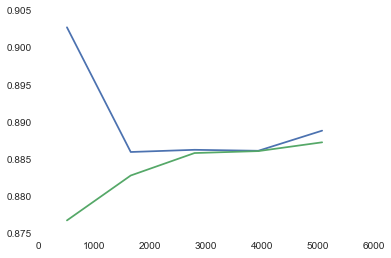

In [183]:
m, train_err, test_err = learning_curve(lr_model, x_test_std, y_test)
train_cv_err = np.mean(train_err,axis=1)
test_cv_err = np.mean(test_err,axis=1)
plt.plot(m,train_cv_err)
plt.plot(m,test_cv_err)

In [31]:
#Feature search: eliminate unimportant features

from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
X_new = clf.fit(x_train_std, y_train).transform(x_train_std)
#clf.feature_importances_  
# X_new.shape  


array([  1.08005360e-01,   2.71436035e-07,   4.10539092e-02,
         2.55037662e-02,   8.25326635e-02,   2.42040542e-02,
         1.39538946e-02,   1.38793637e-02,   2.18250232e-02,
         2.47403812e-02,   1.19544540e-01,   6.24616393e-02,
         1.50570440e-02,   9.74057174e-03,   2.56935446e-02,
         1.19037971e-02,   1.14830248e-02,   4.86565719e-03,
         8.83299623e-03,   1.33430895e-02,   1.99058928e-02,
         1.71605776e-02,   1.50152626e-02,   2.24166868e-02,
         1.68052131e-02,   1.16345858e-02,   8.72321892e-03,
         4.53934919e-03,   7.34122530e-03,   1.53226187e-03,
         7.63494301e-03,   1.10513458e-02,   1.44029803e-02,
         7.21075869e-03,   7.97850247e-03,   1.21721651e-02,
         5.11624387e-03,   1.94468193e-02,   2.44856526e-02,
         1.94440461e-02,   2.13707712e-02,   1.85521227e-02,
         9.48927309e-03,   1.44622020e-02,   4.34833079e-02])

In [113]:
print modelLR.coef_

[[  1.25416396e-03  -4.71654866e-02  -1.32957426e-02  -9.12429650e-03
   -1.16157709e-01  -2.02888328e-01  -5.43330944e-02  -2.33809768e+00
    1.21946282e+00   1.42164890e-01   2.79898290e-01   5.27886263e-01
   -3.98082820e-02  -1.07905583e-02   6.33216032e-03   4.76906364e-02
   -3.18389240e-04   4.93166528e-02  -4.66639481e-03  -1.51533453e-02
   -1.16837970e-03   1.17224604e-02  -8.36123558e-03  -3.47227623e-02
    4.27538670e-02   1.65552389e-01  -1.65552389e-01   5.01311077e-02
    2.07921331e-01   3.03321176e-02   5.72677971e-02  -1.69668660e-01
    1.97357156e-01  -1.31613310e-01  -9.54825803e-02   3.77087066e-02
    4.61676535e-02  -2.95871987e-02  -8.54032913e-02   2.77342504e-02
    1.94592918e-02   6.80280192e-02  -9.63435693e-02   3.06413400e-02
    1.01508877e-01]]


In [264]:
modelLR = LogisticRegression()
modelLR.fit(x_train_std, y_train)
y_predicted = modelLR.predict(x_test_std)
modelLR.coef_
test_features = modelLR.transform(x_train,threshold='mean')
print test_features[:5] 

[[  9.99000000e+02  -1.80000000e+00   9.28930000e+01   1.32700000e+00
    5.09910000e+03   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.20000000e+01  -1.80000000e+00   9.28930000e+01   1.26600000e+00
    5.09910000e+03   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  9.99000000e+02  -1.00000000e-01   9.32000000e+01   4.12000000e+00
    5.19580000e+03   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  9.99000000e+02   1.40000000e+00   9.34440000e+01   4.96200000e+00
    5.22810000e+03   1.00000000e+00   0.00000000e+00   1.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  9.99000000e+02  -1.00000000e-01   9.32000000e+01   4.02100000e+00
    5.19580000e+03   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


In [265]:
num = 0
for i in y_predicted:
    num += 1
    print num
    if i == 1:
        print "win!"
    

1
2
3
4
win!
5
6
7
8
9
10
11
12
13
win!
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
win!
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
win!
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
win!
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
win!
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
win!
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
2

In [112]:
x_train[:5]

array([[ 0.48096537, -0.00992013, -1.08759349, -0.43055897, -0.55933525,
         0.21188711, -0.3716159 ,  0.72747746,  0.8040951 ,  0.87745109,
         0.78666491,  0.401648  , -0.47823713, -0.28638654,  0.88677582,
        -0.20381709, -0.27757536, -0.14288583, -0.22167479, -0.36319438,
         0.86195604, -0.66985458, -0.40636394,  0.96702208, -0.72015916,
        -1.42658398,  1.42658398, -0.27302509, -0.42546303, -0.07194597,
        -0.44719599, -0.36671436, -0.12674168,  1.46028629, -0.35988867,
        -0.14666431, -0.12846731, -0.48128924, -0.50928023, -0.51519879,
        -0.4926807 ,  1.99440032, -0.35785071,  0.4243334 , -0.20162497],
       [-0.2932262 , -0.00992013, -1.08759349, -0.43055897, -0.55933525,
         0.21188711, -0.3716159 , -1.07334749, -0.76586663, -1.35675611,
        -1.15627695, -0.82112839, -0.47823713, -0.28638654, -1.12768072,
        -0.20381709,  3.60262526, -0.14288583, -0.22167479, -0.36319438,
         0.86195604, -0.66985458, -0.40636394,  0.

In [115]:
df.dtypes

age                                int64
default                          float64
housing                          float64
loan                             float64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
job_blue-collar                  float64
job_management                   float64
job_professional                 float64
job_retired                      float64
job_self-employed                float64
job_student                      float64
job_unemployed                   float64
marital_divorced                 float64
marital_married                  float64
marital_single                   float64
education_professional.course    float64
education_some                   float64
education_univer

In [ ]:
models = {'logistic': LogisticRegression(),
          'rf': RandomForestClassifier(n_estimators=),
          'knn': KNeighborsClassifier(n_neighbors=30),
          'svc': SVC(probability=True),
          'tree': DecisionTreeClassifier(),
          #'gbm1': GradientBoostingClassifier(learning_rate=0.4,  n_estimators=200, subsample=1.0, random_state=1, verbose=1),
          #'gbm2': GradientBoostingClassifier(learning_rate=0.04, n_estimators=200, subsample=0.9, random_state=1, verbose=1),
         }
stage_preds = {}
final_preds = {}

In [ ]:
# for mname, m in models.iteritems():
#     print "*** %s" % mname
#     m.fit(train_std, train_t)
 
    
#     if hasattr(m, "staged_predict_proba"):
#         stage_preds[mname] = {'train': list(m.staged_predict_proba(train_std)),  'test': list(m.staged_predict_proba(test_std))}
#     #if hasattr(m, "predict_proba"):
#     final_preds[mname] = {'train': m.predict_proba(train),  'test': m.predict_proba(test)}

In [ ]:

              Accuracy  Precision    Recall        F1   ROC_AUC
LogisticReg   0.888743   0.676784  0.227277  0.341495  0.792784
GaussNB       0.777256   0.314121  0.642662  0.421760  0.774975
DecisionTree  0.880215   0.543059  0.134073  0.283436  0.723300
RandomForest  0.875131   0.509849  0.306063  0.381843  0.767653
kNN           0.885004   0.632839  0.219367  0.325065  0.786252

              Accuracy  Precision    Recall        F1   ROC_AUC
LogisticReg   0.888743   0.664230  0.244412  0.357129  0.799544
GaussNB       0.683252   0.251840  0.762271  0.378514  0.774357
DecisionTree  0.880183   0.587444  0.146097  0.247547  0.698541
RandomForest  0.875033   0.502427  0.302165  0.383748  0.771118
kNN           0.886283   0.642828  0.228810  0.336927  0.776899